In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

## Generación de números aleatorios

In [2]:
import numpy as np

# Generamos los números aleatorios
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


## Visualización del conjunto de datos 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

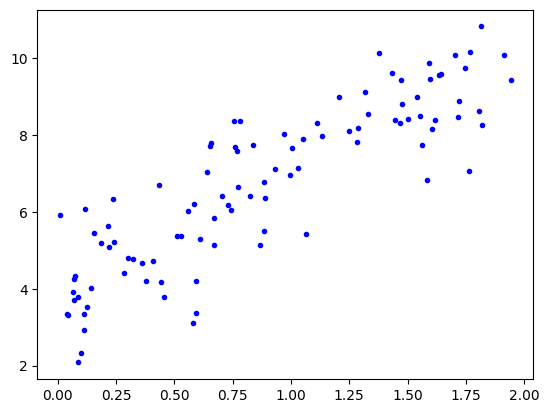

In [4]:
plt.plot(X, y, "b. ")
plt.show()

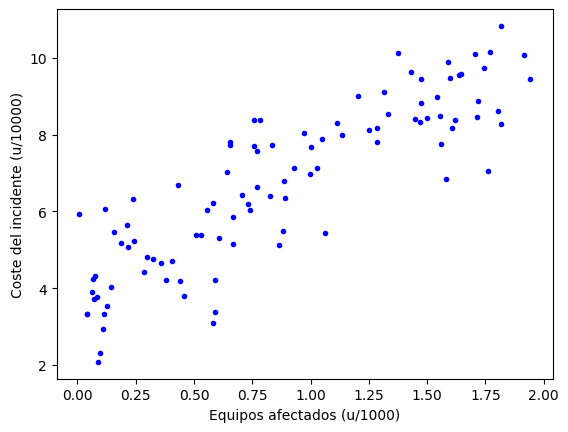

In [5]:
plt.plot(X, y, "b. ") #Mostramos los resultados con matplotlib
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

## Modificación del conjunto de datos

In [6]:
import pandas as pd

In [7]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} #Organizamos en pandas
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.041966,3.320880
1,0.299265,4.810505
2,1.317393,9.121660
3,1.915441,10.082415
4,0.111127,2.931116
5,0.758702,7.692699
6,0.069987,3.708260
7,0.242642,5.223099
8,0.704158,6.419858
9,0.668355,5.845725


In [8]:
#Escalando el número de equipos
df ['n_equipos_afectados'] =  df['n_equipos_afectados'] * 1000
df ['n_equipos_afectados'] =  df['n_equipos_afectados'].astype('int')

#Escalando el coste
df ['coste'] = df['coste'] * 10000
df ['coste'] = df['coste'].astype('int')
df.head(10)


,n_equipos_afectados,coste
0,41,33208
1,299,48105
2,1317,91216
3,1915,100824
4,111,29311
5,758,76926
6,69,37082
7,242,52230
8,704,64198
9,668,58457


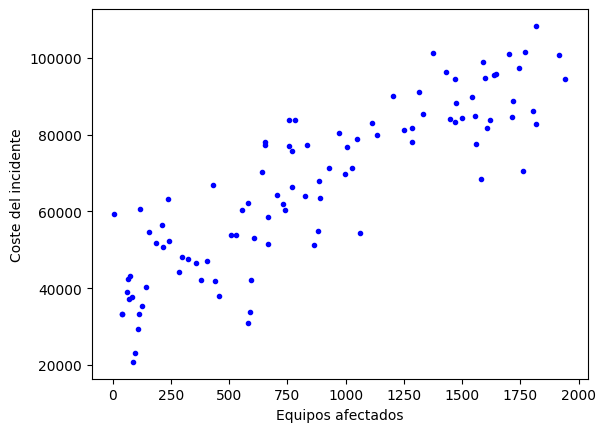

In [9]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()
         

## Construcción del modelo

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Construcción del modelo
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1,1), df['coste'].values)

LinearRegression()

In [12]:
# Parametro theta 0 (corte eje)
lin_reg.intercept_

np.float64(38907.53525972221)

In [13]:
# Parametro theta 1 (pendiente de la función)
lin_reg.coef_

array([31.95335106])

In [14]:
# Predicción para el valor mínimo y máximo del conjunto de entrenamiento
x_min_max = np.array([[df['n_equipos_afectados'].min()], [df['n_equipos_afectados'].max()]])
y_train_pred = lin_reg.predict(x_min_max)

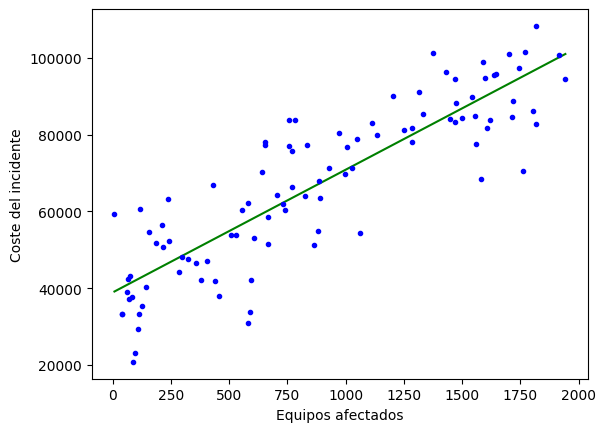

In [15]:
# Representación gráfica de la función hipótesis generada
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

## Predicción de nuevos ejemplos

In [16]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 80446 €


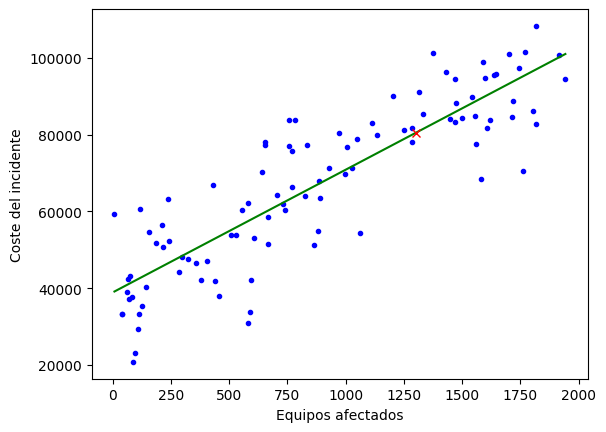

In [17]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

In [18]:
# Importamos las librerias necesarias
    from joblib import dump
     
    # Guardamos el modelo en disco
    dump(lin_reg, 'regresion_lineal.joblib') 

IndentationError: unexpected indent (3543890269.py, line 2)